# Ejercicio 6

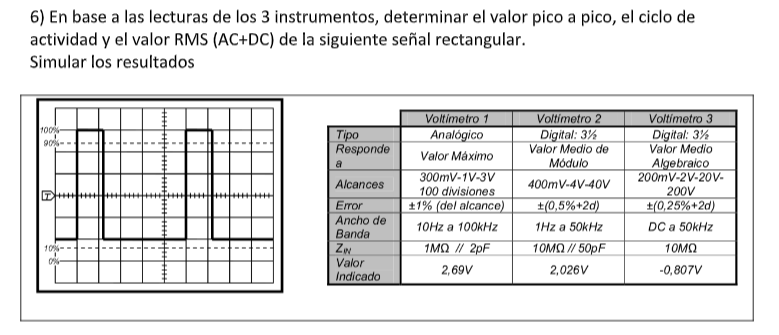

Siendo el valor indicado por el instrumento 1:

$$
S_{i1} = S_{pp}~.~(1 - \delta)~.~\frac{1}{\sqrt{2}}~~~~~~~~con~\delta = \frac{\tau}{T}
$$

Siendo el valor indicado por le instrumento 2:

$$
S_{i2} = S_{pp}~.~(1 - \delta)~.~\delta~.~\frac{\pi}{\sqrt{2}}~~~~~~~~con~\delta = \frac{\tau}{T}
$$

Siendo el cociente de los valores indicados en 1 y 2:

$$
\frac{S_{i1}}{S_{i2}} = \frac{S_{pp}~.~(1 - \delta)~.~\frac{1}{\sqrt{2}}}{S_{pp}~.~(1 - \delta)~.~\delta~.~\frac{\pi}{\sqrt{2}}} = \frac{1}{\pi\delta}
$$

Del cociente de los valores indicados podemos obtener el valor de $\delta$:

$$
\delta = \frac{S_{i2}}{\pi~.~S_{i1}}
$$

In [27]:
from math import pi, sqrt

SI = [2.69, 2.026, -0.807]

delta = SI[1] / (pi * SI[0])

print("El ciclo de actividad es: {:.2f} %".format(delta * 100))

El ciclo de actividad es: 23.97 %


De la ecuacion del valor indicado del instrumento 1:

$$
S_{pp} = \frac{S_{i1}}{(1 - \delta)~.~\frac{1}{\sqrt{2}}} = \frac{\sqrt{2}~.~S_{i1}}{(1 - \delta)}
$$

In [21]:
spp = (sqrt(2) * SI[0]) / (1 - delta)

print("El valor pico a pico de la señal es: {} V".format(spp))

El valor pico a pico de la señal es: 5.003848168637531 V


Siendo el valor RMS de la señal:

$$
S^2_{rms} = \frac{1}{T}~\int_{0}^{T} S^2(t)~dt = \frac{1}{T}~.~(\int_{0}^{\tau} V^2_{p+}~dt~+~\int_{\tau}^{T} V^2_{p-}~dt ) = \frac{1}{T}~.~[V^2_{p+}~.~\tau + V^2_{p-}~.~(T - \tau)]
$$

$$
S^2_{rms} = [V^2_{p+}~.~\delta + V^2_{p-}~.~(1 - delta)]~~(1)
$$

Siendo el valor maximo positivo y negativo del instrumento 1:

$$
V_{p+} = V_{pp}~.~(1 - \delta)~~~~~~~~~~V_{p-} = V_{pp}~.~\delta
$$

Remplazamos en (1):

$$
S^2_{rms} = [V^2_{pp}~.~(1 - \delta)^2~.~\delta + V^2_{pp}~.~\delta^2~.~(1 - \delta)] = V^2_{pp}~.~(1 - \delta)~.~\delta~.~(1 - \delta + \delta) = V^2_{pp}~.~(1 - \delta)~.~\delta
$$

$$
S_{rms} = V_{pp}~.~\sqrt{(1 - \delta)~.~\delta}
$$

In [20]:
srms = spp * sqrt( (1 - delta) * delta )

print("El valor RMS de la señal es: {} V".format(srms))

El valor RMS de la señal es: 2.136261161409014 V


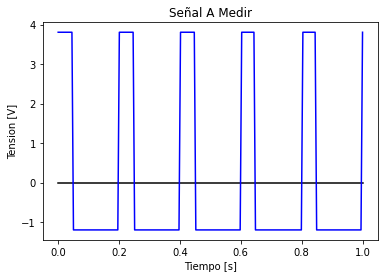

In [26]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

a = 0
b = 1
n = 200
fs = 5

t = np.linspace(a, b, n)

#Lo multiplico para que tenga el Vpp y le sumo lo que le falta para que tenga el Vp+
signal = (spp / 2) * signal.square( 2 * pi * fs * t, delta) + ( spp * (1 - delta) - (spp / 2) )  

#Cte en cero para diferenciar Vp+ y Vp- mas facilmente
cte = np.zeros( (n,), dtype=int )

plt.plot(t, cte, 'k')
plt.plot(t, signal, 'b')
plt.title('Señal A Medir')
plt.xlabel('Tiempo [s]')
plt.ylabel('Tension [V]')
plt.show()